# Lesson: Functions

As usual, let's start with our imports:

In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Functions
Functions are an essential part of a programming language.
You already used many functions like `plot` or `array`.
But you can also define your own functions.
To define a new function, use the `def` command. After `def` follows the name of the function and then between parentheses the arguments of the function and finally a colon. After the colon you indent until you are done with the function. The last line of the function should be `return` followed by what you want to return. For example, consider the following function of $x$:

$f(x)= 2x+1 \qquad x < 1$

$f(x) = 4x-x^2 \qquad x \ge 1$

Let's implement $f(x)$ in a function called `func`. There is one input argument: $x$. 

In [2]:
def func(x):
    if x < 1:
        f = 2*x+1
    else:
        f = 4*x-x**2
    return f
print(func(3))

3


Once you define a function in Python, you can call it whenever you want during the session. So we can call it again

In [3]:
print(func(-2))

-3


Note that once you have defined the function, typing 

`func(` and then hit [shift-tab]

and waiting a moment will provide you with the input arguments of the function in a little pop-up window. That is not very interesting for this case, as the input argument is only $x$, but is very helpful when there are multiple input arguments.

The names of the arguments of a function are the names used inside the function. They have no relationship to the names used outside the function. When using a variable as the argument of a function, only the *values* get passed to the function. In the example below, the *value* of `y` is passed as the first argument ot the function `func`. Inside the function, this value is used for the variable `x`.

In [4]:
y = 2
print('func(2):',func(y))

func(2): 4


### Exercise 1. <a name="back1"></a>First function
Write a Python function for the following function:

$f(x)=x/(cx^2+1)$

The function should take `x` and `c` as input arguments and return the function value. Give your function a unique name (if you also call it `func` it will overwrite the `func` function that we defined above). Make a plot of `f` vs. `x` for `x` going from -10 to 10 using two different values of `c`: 0.1 and 0.2.

<a href="#ex1answer">Answer to Exercise 1</a>

## Local variables
Variables declared inside a function can only be used inside that function. The outside of a function doesn't know about the variables used inside the function, except for the variables that are returned by the function. In the code below, remove the `#` before `print a` and you will get an error message, as `a` is a local variable inside function `localtest` only (then put the `#` back, else you cannot run your entire Notebook anymore with the Cell $\to$ Run All menu command).

In [5]:
def localtest(x):
    a = 3
    b = 5
    return a*x + b
print(localtest(4))
# print(a)  # Will cause an error, as 'a' is not known outside function 

17


## Functions are building blocks that need to be tested separately
Functions are the building blocks of a computer code. They represent a well defined functionality, which means they can *and should* be tested separately. So make it a habit to test whether your function does what you intended it to do. Sometimes it is easy to test a function: you can compare the value to a hand calculation, for example. Other times it is more difficult, and you need to write some additional code to test the function. It is always worthwhile to do that. If you test your functions well, it will aid you in debugging your code, because you know that the error is not inside the function.

## Using a function as the argument of another function
So far, we have used single values or arrays as input arguments of functions. But we can also use a function as one of the input arguments of another function. Consider, for example, a function called `takesquare` that takes two input arguments: a function `finput` and a value `x`, and it returns the function `finput` evaluated at `x` and then squared.

In [6]:
def takesquare(finput, x):
    return finput(x) ** 2

We can now call `takesquare` with any function $f$ that can be called as $f(x)$ and returns one value. For example, we can call it with the square-root function, and we can test right away whether we got the right answer

In [7]:
print('takesquare result:', takesquare(np.sqrt, 2))
print('correct value is: ', np.sqrt(2) ** 2)

takesquare result: 2.0
correct value is:  2.0


## Finding the zero of a function
Finding the zero of a function is a common task in exploratory computing. The value where the function equals zero is also called the *root* and finding the zero is referred to as *root finding*. There exist a number of methods to find the zero of a function varying from robust but slow (so it always finds a zero but it takes quite a few function evaluations) to fast but not so robust (it can find the zero very fast, but it won't always find it). Here we'll use the latter one.

Consider the function $f(x)=2x+1$. The function is zero when $x=-0.5$, but let's pretend we don't know that and try to find it using a root finding method. First, we need to write a Python function for $f(x)$.

In [8]:
def f(x):
    return 2*x+1

We will use the method `fsolve` to find the zero of a function. `fsolve` is part of the `scipy.optimize` package. `fsolve` takes two arguments: the function for which we want to find the zero, and a starting value for the search (not surpisingly, the closer the starting value is to the root, the higher the chance that `fsolve` will find it).

In [9]:
from scipy.optimize import fsolve
xzero = fsolve(f,1)
print('result of fsolve:', xzero)
print('f(x) at xzero:   ', f(xzero))

result of fsolve: [-0.5]
f(x) at xzero:    [ 0.]


### Exercise <a name="back2"></a>2

Use `fsolve` to find a zero of the function `func` you defined at the beginning of this notebook. Does the answer depend on the initial guess that you provide?

<a href="#ex2answer">Answer to Exercise 2</a>

### Exercise 3

Can you use `fsolve` to find the square root of 1369 (that is, a value of $x$ such that $x^2$ = 1369)? Once you find the answer, verify that squaring it indeed gives you back 1369.

<a href="#ex3answer">Answer to Exercise 3</a>

## Answers to the exercises

<a name="ex1answer">Answer to Exercise 1</a>

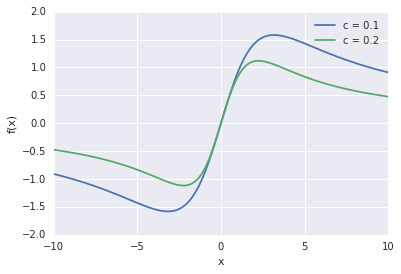

In [10]:
def test(x, c):
    return x / (c * x**2 + 1)
x = np.linspace(-10, 10, 100)
y1 = test(x, 0.1)  # This function can be called with an array
y2 = test(x, 0.2)
plt.plot(x, y1, label='c = 0.1') # if you specify a label, it will automatically be used in the legend
plt.plot(x, y2, label='c = 0.2')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

 <a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answer to Exercise 2</a>

There are two places where the function is zero; you can find them both by providing different initial guesses:

In [11]:
xzero = fsolve(func, 1)
print('result of fsolve:', xzero)
print('f(x) at xzero:   ', func(xzero))

result of fsolve: [-0.5]
f(x) at xzero:    [ 0.]


In [12]:
xzero = fsolve(func, 10)
print('result of fsolve:', xzero)
print('f(x) at xzero:   ', func(xzero))

result of fsolve: [ 4.]
f(x) at xzero:    [ 0.]


 <a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answer to Exercise 3</a>

Finding a square root of 1369 is the same as solving for the zero of $f(x) = x^2 - 1369$.

In [13]:
def ex3func(x):
    return x**2 - 1369

xzero = fsolve(ex3func, 1)
print('square root of 1369:', xzero)
print('the square root squared:', xzero**2)

square root of 1369: [ 37.]
the square root squared: [ 1369.]


 <a href="#back3">Back to Exercise 3</a>